In [7]:
import os

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({
    'font.size': 14,
    'font.family': 'serif',
    'axes.linewidth': 1.0,
    'axes.labelsize': 16,
    'lines.linewidth': 2,
    'lines.markersize': 7,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'figure.figsize': (6,4),
    'legend.frameon': False
})
from sqlalchemy import create_engine

In [8]:
db_path = os.getenv("DB_URI")
assert db_path is not None and db_path != ""
engine = create_engine(db_path)

## News Data

In [9]:
news = pd.read_sql('SELECT * FROM dl_feed_news', engine)

In [10]:
news.head()

,guid,title,content,link,pub_date,topic,sentiment,entities
0,QTCX3BSV4FGYVNQWN6GPR5BEQA,Tether CEO Ardoino Says He Expects U.S. Will C...,Tether CEO Paolo Ardoino told a U.S. crowd on ...,https://www.coindesk.com/policy/2024/10/22/tet...,2024-10-22 18:23:41+00:00,Regulation and Compliance,positive,"[Tether, Paolo Ardoino, U.S., DC Fintech Week,..."
1,KJRQ4VEHRZBATK2WKHKTORU4RQ,Aurum Launches $1B Tokenized Fund for Data Cen...,The vehicle will focus on data center investme...,https://www.coindesk.com/business/2024/10/22/a...,2024-10-22 18:09:27+00:00,Tokenized Investments,positive,"[Aurum, XRP Ledger, Zoniqx, United States, Uni..."
2,https://www.dlnews.com/articles/markets/bizarr...,How bizarre AI cults are creating a new billio...,Inside the obscure world of AI cult tokens and...,https://www.dlnews.com/articles/markets/bizarr...,2024-10-22 17:55:00+00:00,Speculative Trading,negative,"[AI cults, memecoins, cryptocurrency, speculat..."
3,ZMIUV2NEEZAEVFEKMMEEX5KNGQ,Bitcoin Exchange River Financial Allowing User...,"Not a bank itself, River has teamed up with Le...",https://www.coindesk.com/business/2024/10/22/b...,2024-10-22 16:43:10+00:00,Digital Finance Services,positive,"[River Financial, Lead Bank, FDIC]"
4,6T2OJZBRUBFANOVS2ATPLJHZJU,Metaplanet Raises $66 Million Through Stocks A...,MetaPlanet completes its 11th series of stock ...,https://www.coindesk.com/business/2024/10/22/m...,2024-10-22 16:22:06+00:00,Investment Strategies,positive,"[MetaPlanet, Evo Fund]"


In [11]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   guid       2248 non-null   object             
 1   title      2248 non-null   object             
 2   content    1517 non-null   object             
 3   link       2248 non-null   object             
 4   pub_date   2248 non-null   datetime64[ns, UTC]
 5   topic      2248 non-null   object             
 6   sentiment  2248 non-null   object             
 7   entities   2248 non-null   object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 140.6+ KB


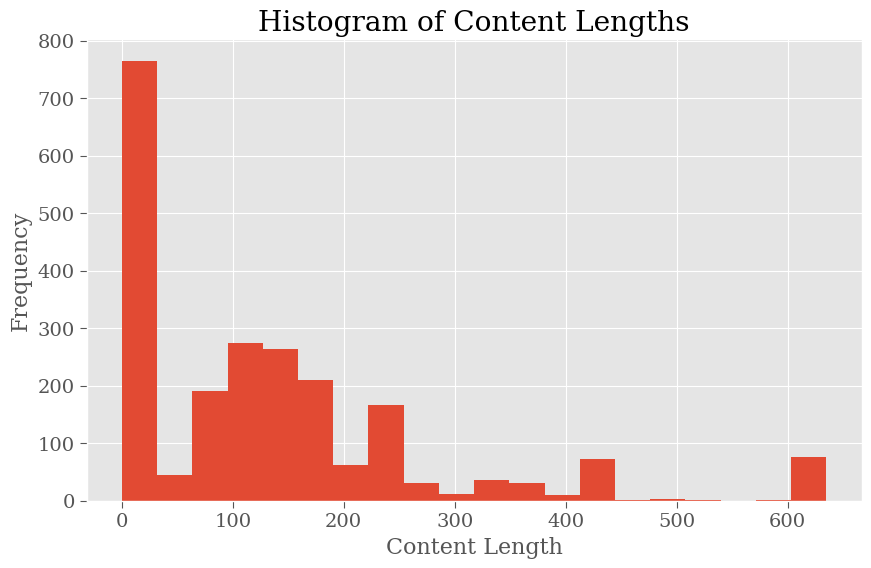

In [12]:
news['content_length'] = news['content'].astype(str).apply(len)

plt.figure(figsize=(10, 6))
plt.hist(news['content_length'], bins=20)
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.title('Histogram of Content Lengths')
plt.show()

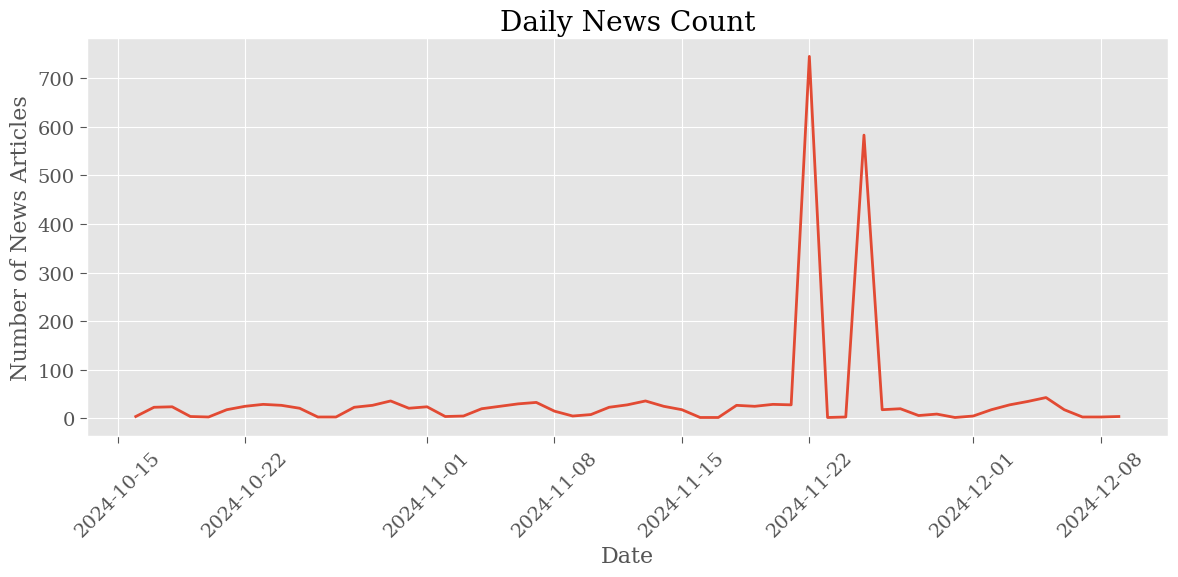

In [13]:
news['date'] = news['pub_date'].dt.date

daily_news_count = news.groupby('date')['title'].count()

plt.figure(figsize=(12, 6))
plt.plot(daily_news_count.index, daily_news_count.values)
plt.xlabel('Date')
plt.ylabel('Number of News Articles')
plt.title('Daily News Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
news.groupby('date')['title'].count().mean()

40.872727272727275

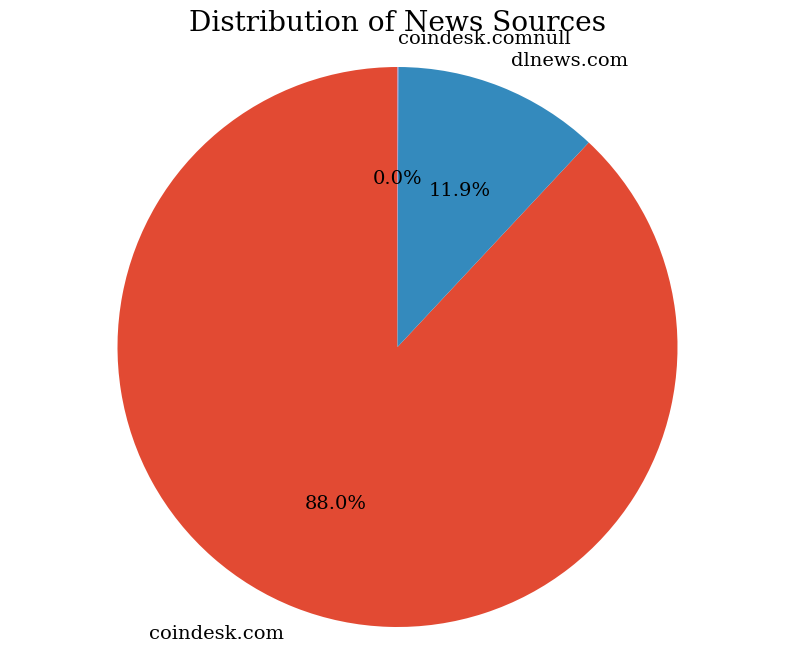

In [15]:
news['source'] = news['link'].str.extract(r'(?:https?://)?(?:www\.)?([^/]+)')
source_counts = news['source'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of News Sources')
plt.axis('equal')
plt.show()

## Twitter Data

In [16]:
twitter = pd.read_sql('SELECT * FROM dl_feed_tweets', engine)

In [17]:
twitter.head()

,tweet_id,tweet_created_at,tweet,url,user_name,user_handle,sentiment
0,1848796310335357145,2024-10-22 18:39:24.299000+00:00,Notcoin founder says Binance and ‘poor guys fr...,https://twitter.com/TheBlock__/status/18487963...,The Block,TheBlock__,negative
1,1848794535507464461,2024-10-22 18:32:21.331000+00:00,A fresh wallet withdrew 1.06M $PENDLE($5.08M) ...,https://twitter.com/lookonchain/status/1848794...,Lookonchain,lookonchain,neutral
2,1848791189853487472,2024-10-22 18:19:03.502000+00:00,Rep. French Hill remains hopeful for crypto le...,https://twitter.com/TheBlock__/status/18487911...,The Block,TheBlock__,positive
3,1848788471671853253,2024-10-22 18:08:15.437000+00:00,Bitcoin mining difficulty hits new all-time hi...,https://twitter.com/TheBlock__/status/18487884...,The Block,TheBlock__,positive
4,1848779677759918511,2024-10-22 17:33:18.793000+00:00,Tether is 'doubling down' on communication and...,https://twitter.com/TheBlock__/status/18487796...,The Block,TheBlock__,positive


In [18]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2015 non-null   object             
 1   tweet_created_at  2015 non-null   datetime64[ns, UTC]
 2   tweet             2015 non-null   object             
 3   url               2015 non-null   object             
 4   user_name         2015 non-null   object             
 5   user_handle       2015 non-null   object             
 6   sentiment         1917 non-null   object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 110.3+ KB


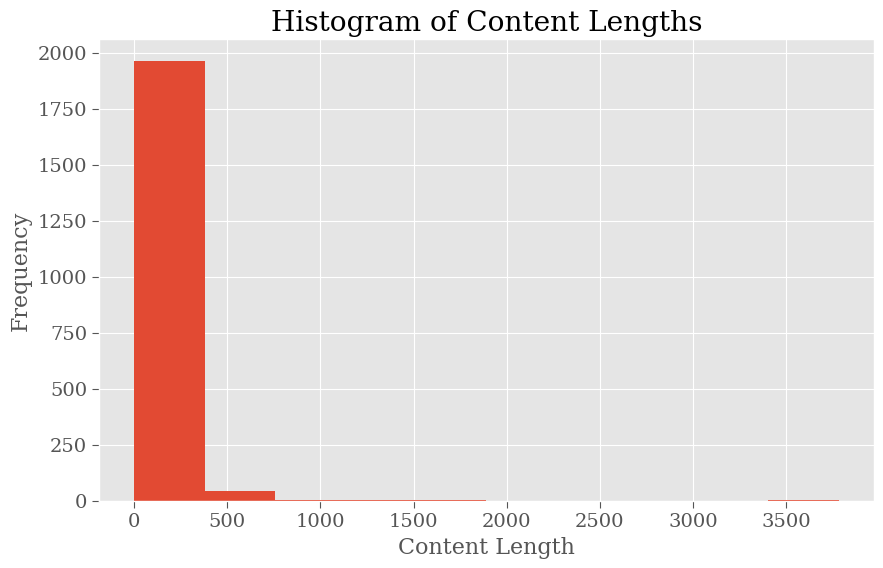

In [19]:
twitter['content_length'] = twitter['tweet'].astype(str).apply(len)
plt.figure(figsize=(10, 6))
plt.hist(twitter['content_length'])
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.title('Histogram of Content Lengths')
plt.show()

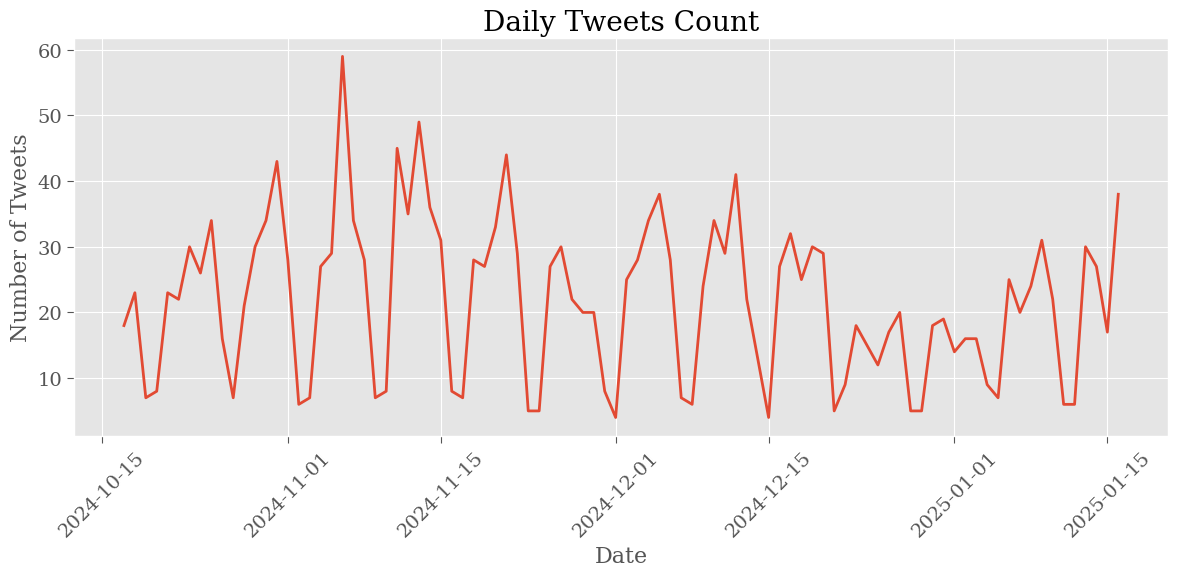

In [20]:
twitter['date'] = twitter['tweet_created_at'].dt.date

daily_tweets_count = twitter.groupby('date')['tweet'].count()

plt.figure(figsize=(12, 6))
plt.plot(daily_tweets_count.index, daily_tweets_count.values)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Daily Tweets Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
twitter.groupby('date')['tweet'].count().mean()

21.902173913043477

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128737 (\N{SHIELD}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)


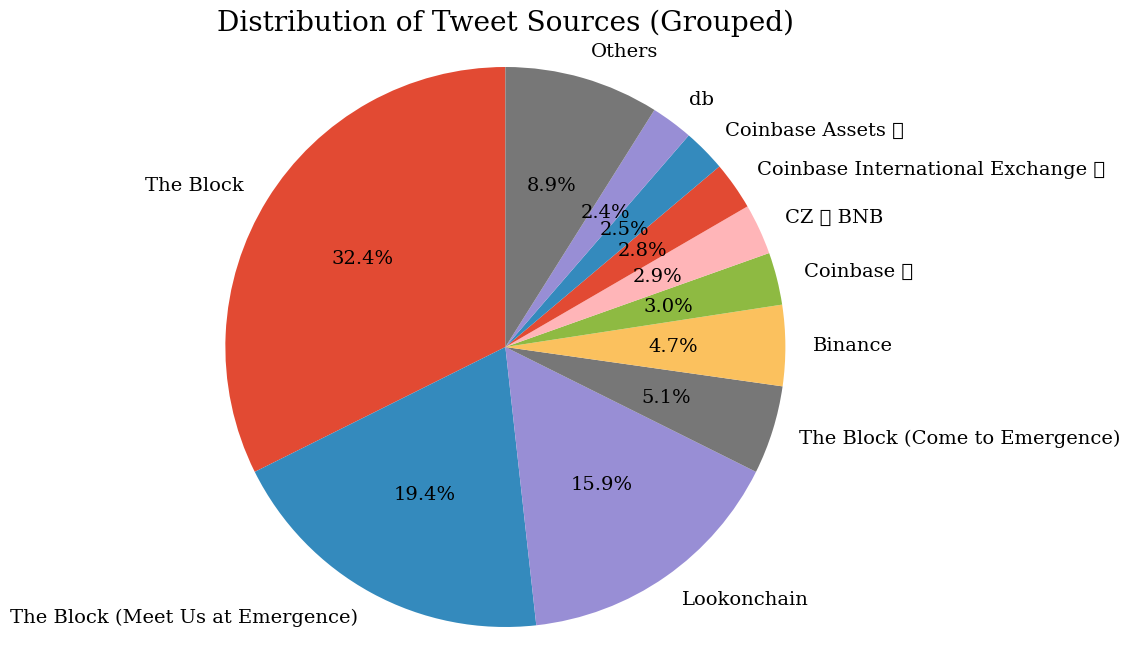

In [24]:
source_counts = twitter['user_name'].value_counts()
threshold = 0.02 * source_counts.sum()
filtered_counts = source_counts[source_counts >= threshold]
others_sum = source_counts[source_counts < threshold].sum()
filtered_counts['Others'] = others_sum

plt.figure(figsize=(10, 8))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Tweet Sources (Grouped)')
plt.axis('equal')
plt.show()

In [25]:
twitter['user_name'].unique()

array(['The Block', 'Lookonchain', 'Lido', 'Coinbase 🛡️', 'Binance',
       'Coinbase International Exchange 🛡️', 'Coinbase Assets 🛡️',
       'Robinhood Crypto EU', 'vitalik.eth', 'Donald J. Trump',
       'The Block Pro Headlines', 'zoomer', 'Blockworks', 'db', 'ZachXBT',
       'CZ 🔶 BNB', 'The Block (Meet Us at Emergence)', 'GCR',
       'PeckShield Inc.', 'WBTC', 'Cobie',
       'The Block (Come to Emergence)', 'Rocket Pool', 'Sam Altman'],
      dtype=object)

In [26]:
len(twitter['user_name'].unique())

24